<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [22]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [23]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [24]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

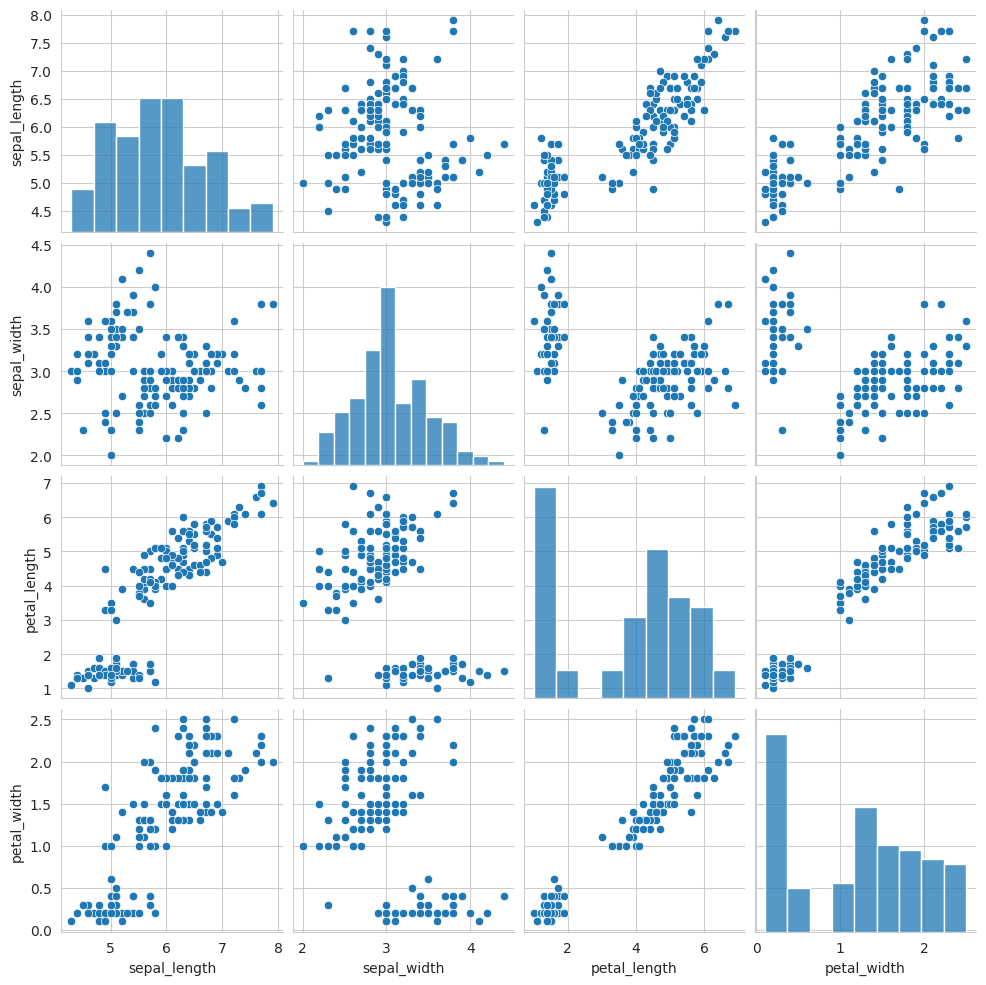

In [25]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** os 4 atributos Contribuem para a clusterização.

Se olharmos existem grupos ha grupos menores mais concentrados, e dividido deles estão os grupos maiores.




## 2\. Dados

### **2.1. Valores nulos**

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [26]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

### **2.2. Variáveis numéricas**

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [27]:
media_sepal_length = iris['sepal_length'].mean()
desvio_padrao_sepal_length = iris['sepal_length'].std()
iris['sepal_length_std'] = iris['sepal_length'].apply(lambda s_l: (s_l - media_sepal_length) / desvio_padrao_sepal_length)

media_sepal_width = iris['sepal_width'].mean()
desvio_padrao_sepal_width = iris['sepal_width'].std()
iris['sepal_width_std'] = iris['sepal_width'].apply(lambda s_w: (s_w - media_sepal_width) / desvio_padrao_sepal_width)

media_petal_length = iris['petal_length'].mean()
desvio_padrao_petal_length = iris['petal_length'].std()
iris['petal_length_std'] = iris['petal_length'].apply(lambda p_l: (p_l - media_petal_length) / desvio_padrao_petal_length)

media_petal_width = iris['petal_width'].mean()
desvio_padrao_petal_width = iris['petal_width'].std()
iris['petal_width_std'] = iris['petal_width'].apply(lambda p_w: (p_w - media_petal_width) / desvio_padrao_petal_width)


### **2.3. Limpeza**

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [28]:
iris_df = iris.drop(columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df.head()

,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


## 3\. Modelagem

### **3.1. Treino**

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [29]:
from sklearn.cluster import KMeans
model = KMeans()
wcss = []

for n in range(1,11):
  model = KMeans(n_clusters=n)
  model = model.fit(iris_df)
  wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

### **3.2. Avaliação**

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

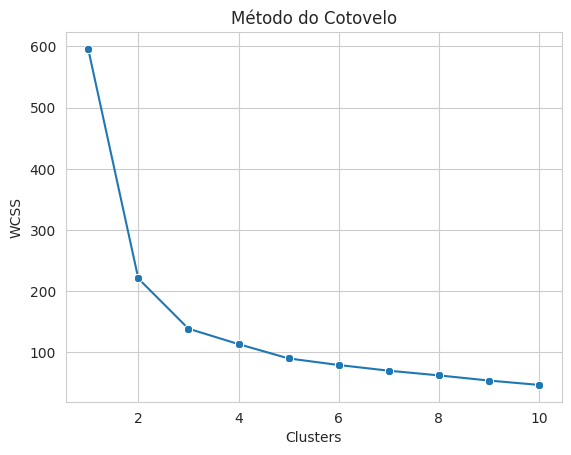

In [30]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8")
  grafico.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Clusters');

### **3.3. Visualização**

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [31]:
model = KMeans(n_clusters=5)
model = model.fit(iris_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clusters.head()

,cluster
0,1
1,4
2,4
3,4
4,1


In [34]:
clustered_data = pd.concat([iris_df, clusters], axis=1)
clustered_data.head()

,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std,cluster
0,-0.897674,1.015602,-1.335752,-1.311052,1
1,-1.139200,-0.131539,-1.335752,-1.311052,4
2,-1.380727,0.327318,-1.392399,-1.311052,4
3,-1.501490,0.097889,-1.279104,-1.311052,4
4,-1.018437,1.245030,-1.335752,-1.311052,1


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

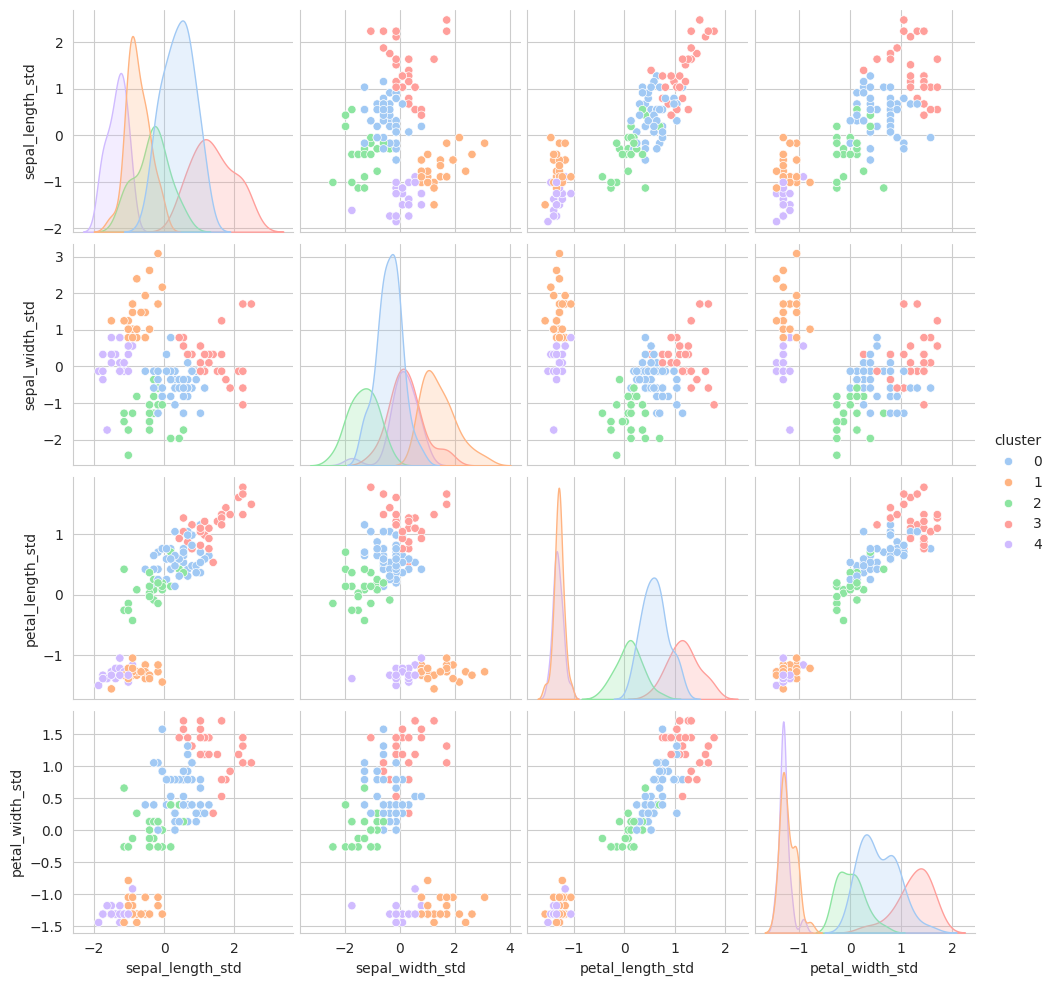

In [35]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

**Comentário:** O grupo menor e mais afastado é composto pelos clusters 1 e 4 que estão concentrados,
O grupo maior é formado 3 clusters 0, 2 e 3; o cluster 0 é uma transição entre os clusters 3 e 2

## 4\. Predição  

### **4.1. Nova flor**

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [36]:
iris_df.head()

,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [38]:
sepal_l = (5.1 - media_sepal_length) / desvio_padrao_sepal_length
sepal_w = (3.5 - media_sepal_width) / desvio_padrao_sepal_width
petal_l = (1.4 - media_petal_length) / desvio_padrao_petal_length
petal_w = (0.2 - media_petal_width) / desvio_padrao_petal_width

---

In [40]:
nova_flor = np.array([sepal_l, sepal_w, petal_l, petal_w])
print(nova_flor)

[-0.89767388  1.01560199 -1.33575163 -1.31105215]


In [41]:
cluster = model.predict(nova_flor.reshape(1, -1))
print(cluster)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


A nova_flor está alocada no Cluster 1